# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

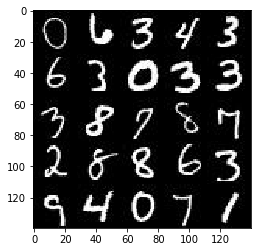

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

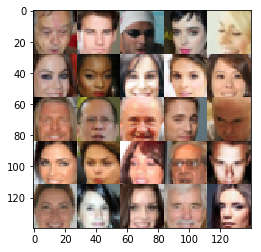

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate' )
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [203]:
alpha = 0.05

def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    with tf.variable_scope('discriminator', reuse=reuse):
        
#         model = tf.layers.conv2d(images, 32, 5, strides=2, padding='same', 
#                               kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
#         model = tf.maximum(alpha * model, model)
        #model = tf.nn.dropout(model, 0.5)
        
        model = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', 
                              kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        model = tf.maximum(alpha * model, model)
        #model = tf.nn.dropout(model, 0.5)
        
        model = tf.layers.conv2d(model, 128, 5, strides=2, padding='same',
                              kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        model = tf.layers.batch_normalization(model, training=True)
        model = tf.maximum(alpha * model, model)
        model = tf.nn.dropout(model, 0.7)
        
        model = tf.layers.conv2d(model, 256, 5, strides=2, padding='same',
                              kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        model = tf.layers.batch_normalization(model, training=True)
        model = tf.maximum(alpha * model, model)
        model = tf.nn.dropout(model, 0.5)
        
        model = tf.reshape(model, (-1, 4*4*256))
        logits = tf.layers.dense(model, 1, kernel_initializer=tf.contrib.layers.xavier_initializer())
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [216]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    with tf.variable_scope('generator', reuse=not is_train):

        model = tf.layers.dense(z, 7*7*256, kernel_initializer=tf.contrib.layers.xavier_initializer())

        model = tf.reshape(model, (-1, 7, 7, 256))
        #model = tf.layers.batch_normalization(model, training=is_train)
        model = tf.maximum(alpha * model, model)

        model = tf.layers.conv2d_transpose(model, 256, 5, strides=1, padding='same',
                                        kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        model = tf.layers.batch_normalization(model, training=is_train)
        model = tf.maximum(alpha * model, model)
#         model = tf.nn.dropout(model, 0.5)

        model = tf.layers.conv2d_transpose(model, 256, 5, strides=1, padding='same',
                                        kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        model = tf.layers.batch_normalization(model, training=is_train)
        model = tf.maximum(alpha * model, model)
        
        model = tf.layers.conv2d_transpose(model, 128, 5, strides=2, padding='same',
                                        kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        model = tf.layers.batch_normalization(model, training=is_train)
        model = tf.maximum(alpha * model, model)

        model = tf.layers.conv2d_transpose(model, 128, 5, strides=1, padding='same',
                                        kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        model = tf.layers.batch_normalization(model, training=is_train)
        model = tf.maximum(alpha * model, model)
        model = tf.nn.dropout(model, 0.5)
        
        model = tf.layers.conv2d_transpose(model, 64, 5, strides=2, padding='same',
                                        kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        model = tf.layers.batch_normalization(model, training=is_train)
        model = tf.maximum(alpha * model, model)

        model = tf.layers.conv2d_transpose(model, 64, 5, strides=1, padding='same',
                                        kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        model = tf.layers.batch_normalization(model, training=is_train)
        model = tf.maximum(alpha * model, model)
        
        logits = tf.layers.conv2d_transpose(model, out_channel_dim, 5, strides=1, padding='same',
                                            kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())

        out = tf.tanh(logits)
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [217]:
smooth = 0.1 

def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [218]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [219]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [220]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """

    inputs_real, inputs_z, learning_rate_tensor = model_inputs(data_shape[1],data_shape[2],data_shape[3], z_dim)
    out_channel_dim = 3 if data_image_mode == 'RGB' else 1
    d_loss, g_loss = model_loss(inputs_real, inputs_z, out_channel_dim)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate_tensor, beta1)
    
    
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                steps += 1
                
                batch_images = batch_images*2 
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={inputs_real: batch_images, inputs_z: batch_z, learning_rate_tensor : learning_rate})
                _ = sess.run(g_opt, feed_dict={inputs_z: batch_z, inputs_real: batch_images, learning_rate_tensor : learning_rate})
                
                if steps % 20 == 0:
                    train_loss_d = d_loss.eval({inputs_z: batch_z, inputs_real: batch_images})
                    train_loss_g = g_loss.eval({inputs_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                
                if steps % 100 == 0:
                    show_generator_output(sess, 25, inputs_z, out_channel_dim, data_image_mode)
                    
                    

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.7580... Generator Loss: 1.7422
Epoch 1/2... Discriminator Loss: 0.6197... Generator Loss: 2.2303
Epoch 1/2... Discriminator Loss: 0.7215... Generator Loss: 2.4062
Epoch 1/2... Discriminator Loss: 1.2141... Generator Loss: 1.7382
Epoch 1/2... Discriminator Loss: 0.9335... Generator Loss: 2.2373


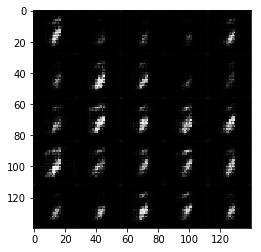

Epoch 1/2... Discriminator Loss: 2.1289... Generator Loss: 1.2340
Epoch 1/2... Discriminator Loss: 1.4318... Generator Loss: 0.9787
Epoch 1/2... Discriminator Loss: 1.2234... Generator Loss: 1.6430
Epoch 1/2... Discriminator Loss: 0.9642... Generator Loss: 1.2408
Epoch 1/2... Discriminator Loss: 0.9998... Generator Loss: 2.1139


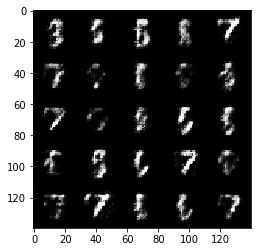

Epoch 1/2... Discriminator Loss: 1.7814... Generator Loss: 1.4453
Epoch 1/2... Discriminator Loss: 1.0036... Generator Loss: 1.2193
Epoch 1/2... Discriminator Loss: 1.0855... Generator Loss: 1.1071
Epoch 1/2... Discriminator Loss: 1.2109... Generator Loss: 0.9827
Epoch 1/2... Discriminator Loss: 1.0679... Generator Loss: 1.6411


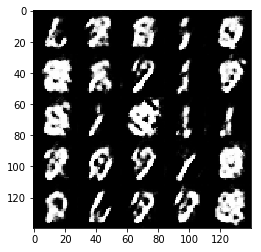

Epoch 1/2... Discriminator Loss: 1.2192... Generator Loss: 1.4242
Epoch 1/2... Discriminator Loss: 1.1239... Generator Loss: 1.3339
Epoch 1/2... Discriminator Loss: 1.7372... Generator Loss: 1.0601
Epoch 1/2... Discriminator Loss: 0.7898... Generator Loss: 2.2143
Epoch 1/2... Discriminator Loss: 1.2217... Generator Loss: 2.1649


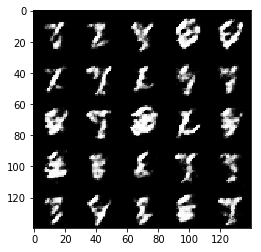

Epoch 1/2... Discriminator Loss: 1.1239... Generator Loss: 1.7033
Epoch 1/2... Discriminator Loss: 1.0889... Generator Loss: 1.8223
Epoch 1/2... Discriminator Loss: 1.7377... Generator Loss: 0.9172
Epoch 1/2... Discriminator Loss: 1.0008... Generator Loss: 1.6790
Epoch 1/2... Discriminator Loss: 1.0325... Generator Loss: 1.1735


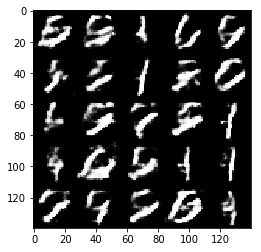

Epoch 1/2... Discriminator Loss: 1.2643... Generator Loss: 1.2506
Epoch 1/2... Discriminator Loss: 1.2756... Generator Loss: 1.0869
Epoch 1/2... Discriminator Loss: 1.4133... Generator Loss: 0.7535
Epoch 1/2... Discriminator Loss: 1.1104... Generator Loss: 1.1554
Epoch 1/2... Discriminator Loss: 1.3042... Generator Loss: 1.0451


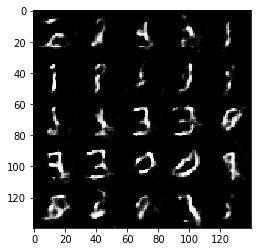

Epoch 1/2... Discriminator Loss: 0.8938... Generator Loss: 1.5619
Epoch 1/2... Discriminator Loss: 1.4200... Generator Loss: 1.0958
Epoch 1/2... Discriminator Loss: 1.1608... Generator Loss: 1.3545
Epoch 1/2... Discriminator Loss: 1.1326... Generator Loss: 1.4799
Epoch 1/2... Discriminator Loss: 1.1942... Generator Loss: 1.1637


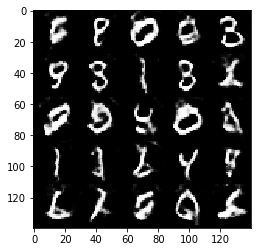

Epoch 1/2... Discriminator Loss: 1.3185... Generator Loss: 0.9932
Epoch 1/2... Discriminator Loss: 1.2576... Generator Loss: 0.9161
Epoch 1/2... Discriminator Loss: 1.2938... Generator Loss: 1.0959
Epoch 1/2... Discriminator Loss: 1.4452... Generator Loss: 0.9860
Epoch 1/2... Discriminator Loss: 1.4135... Generator Loss: 0.8100


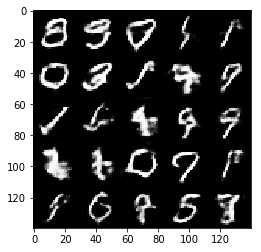

Epoch 1/2... Discriminator Loss: 1.4874... Generator Loss: 1.0880
Epoch 1/2... Discriminator Loss: 1.2790... Generator Loss: 0.7205
Epoch 1/2... Discriminator Loss: 1.2128... Generator Loss: 0.7860
Epoch 1/2... Discriminator Loss: 1.3837... Generator Loss: 1.0771
Epoch 1/2... Discriminator Loss: 1.3144... Generator Loss: 1.0777


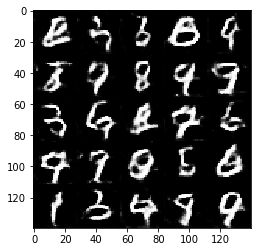

Epoch 1/2... Discriminator Loss: 1.2555... Generator Loss: 1.1421
Epoch 1/2... Discriminator Loss: 1.2820... Generator Loss: 0.8726
Epoch 1/2... Discriminator Loss: 1.4189... Generator Loss: 0.8962
Epoch 1/2... Discriminator Loss: 1.4139... Generator Loss: 0.9522
Epoch 1/2... Discriminator Loss: 1.1593... Generator Loss: 0.9886


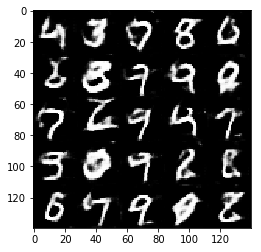

Epoch 1/2... Discriminator Loss: 1.4091... Generator Loss: 0.9392
Epoch 1/2... Discriminator Loss: 1.1361... Generator Loss: 1.0501
Epoch 1/2... Discriminator Loss: 1.4520... Generator Loss: 0.7817
Epoch 1/2... Discriminator Loss: 1.1261... Generator Loss: 1.0732
Epoch 1/2... Discriminator Loss: 1.3104... Generator Loss: 0.9577


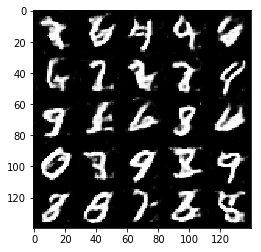

Epoch 1/2... Discriminator Loss: 1.2117... Generator Loss: 1.0224
Epoch 1/2... Discriminator Loss: 1.3772... Generator Loss: 0.7713
Epoch 1/2... Discriminator Loss: 1.3916... Generator Loss: 0.9831
Epoch 1/2... Discriminator Loss: 1.2077... Generator Loss: 0.7778
Epoch 1/2... Discriminator Loss: 1.2451... Generator Loss: 0.7884


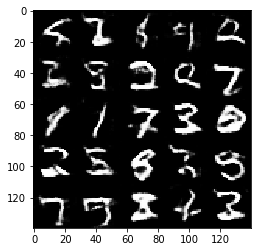

Epoch 1/2... Discriminator Loss: 1.6225... Generator Loss: 0.6041
Epoch 1/2... Discriminator Loss: 1.1999... Generator Loss: 0.9384
Epoch 1/2... Discriminator Loss: 1.4286... Generator Loss: 0.7226
Epoch 1/2... Discriminator Loss: 1.4497... Generator Loss: 0.6814
Epoch 1/2... Discriminator Loss: 1.2997... Generator Loss: 0.9373


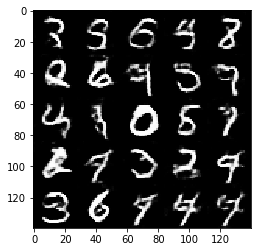

Epoch 1/2... Discriminator Loss: 1.2375... Generator Loss: 1.1611
Epoch 1/2... Discriminator Loss: 1.3838... Generator Loss: 0.9741
Epoch 1/2... Discriminator Loss: 1.3481... Generator Loss: 0.9099
Epoch 1/2... Discriminator Loss: 1.3337... Generator Loss: 0.9712
Epoch 1/2... Discriminator Loss: 1.2758... Generator Loss: 1.0269


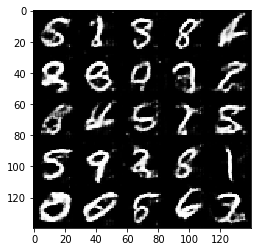

Epoch 1/2... Discriminator Loss: 1.3407... Generator Loss: 0.8900
Epoch 1/2... Discriminator Loss: 1.2355... Generator Loss: 0.9519
Epoch 1/2... Discriminator Loss: 1.3846... Generator Loss: 0.7119
Epoch 1/2... Discriminator Loss: 1.3421... Generator Loss: 0.9368
Epoch 1/2... Discriminator Loss: 1.4033... Generator Loss: 0.7951


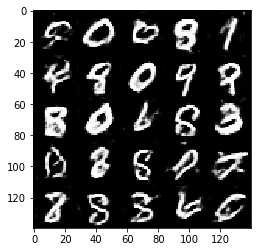

Epoch 1/2... Discriminator Loss: 1.3520... Generator Loss: 0.8297
Epoch 1/2... Discriminator Loss: 1.3154... Generator Loss: 1.1345
Epoch 1/2... Discriminator Loss: 1.4159... Generator Loss: 0.8345
Epoch 1/2... Discriminator Loss: 1.2847... Generator Loss: 0.9931
Epoch 1/2... Discriminator Loss: 1.2949... Generator Loss: 1.0617


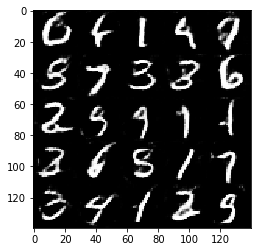

Epoch 1/2... Discriminator Loss: 1.4426... Generator Loss: 0.8750
Epoch 1/2... Discriminator Loss: 1.3123... Generator Loss: 1.0259
Epoch 1/2... Discriminator Loss: 1.4491... Generator Loss: 0.8904
Epoch 1/2... Discriminator Loss: 1.3321... Generator Loss: 0.7637
Epoch 1/2... Discriminator Loss: 1.3068... Generator Loss: 0.9091


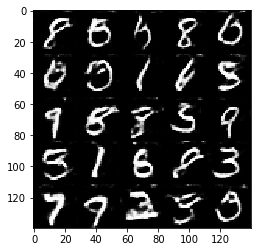

Epoch 1/2... Discriminator Loss: 1.3759... Generator Loss: 0.6932
Epoch 1/2... Discriminator Loss: 1.1670... Generator Loss: 1.2121
Epoch 1/2... Discriminator Loss: 1.4363... Generator Loss: 1.0301
Epoch 1/2... Discriminator Loss: 1.2858... Generator Loss: 1.0255
Epoch 1/2... Discriminator Loss: 1.3480... Generator Loss: 0.9902


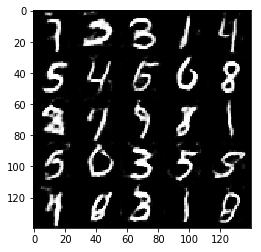

Epoch 1/2... Discriminator Loss: 1.3327... Generator Loss: 0.7919
Epoch 1/2... Discriminator Loss: 1.3150... Generator Loss: 0.8215
Epoch 1/2... Discriminator Loss: 1.3406... Generator Loss: 1.0237
Epoch 2/2... Discriminator Loss: 1.3164... Generator Loss: 0.9799
Epoch 2/2... Discriminator Loss: 1.3393... Generator Loss: 0.8385


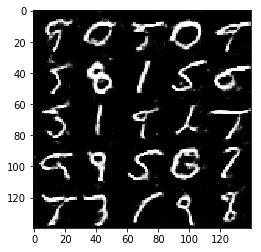

Epoch 2/2... Discriminator Loss: 1.3290... Generator Loss: 1.0438
Epoch 2/2... Discriminator Loss: 1.3364... Generator Loss: 0.8549
Epoch 2/2... Discriminator Loss: 1.3355... Generator Loss: 0.8509
Epoch 2/2... Discriminator Loss: 1.2771... Generator Loss: 0.9601
Epoch 2/2... Discriminator Loss: 1.3889... Generator Loss: 0.8086


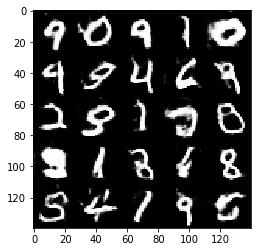

Epoch 2/2... Discriminator Loss: 1.3118... Generator Loss: 0.8842
Epoch 2/2... Discriminator Loss: 1.3123... Generator Loss: 0.9572
Epoch 2/2... Discriminator Loss: 1.3202... Generator Loss: 1.0501
Epoch 2/2... Discriminator Loss: 1.3781... Generator Loss: 0.8823
Epoch 2/2... Discriminator Loss: 1.4066... Generator Loss: 0.8671


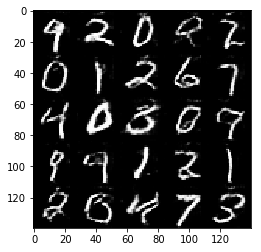

Epoch 2/2... Discriminator Loss: 1.2413... Generator Loss: 1.0871
Epoch 2/2... Discriminator Loss: 1.2456... Generator Loss: 0.9361
Epoch 2/2... Discriminator Loss: 1.2779... Generator Loss: 0.8489
Epoch 2/2... Discriminator Loss: 1.3194... Generator Loss: 0.9338
Epoch 2/2... Discriminator Loss: 1.2806... Generator Loss: 0.9342


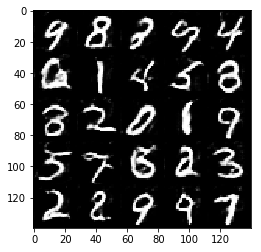

Epoch 2/2... Discriminator Loss: 1.4093... Generator Loss: 0.7494
Epoch 2/2... Discriminator Loss: 1.2843... Generator Loss: 1.0324
Epoch 2/2... Discriminator Loss: 1.2808... Generator Loss: 1.0463
Epoch 2/2... Discriminator Loss: 1.2989... Generator Loss: 1.0112
Epoch 2/2... Discriminator Loss: 1.3678... Generator Loss: 0.9101


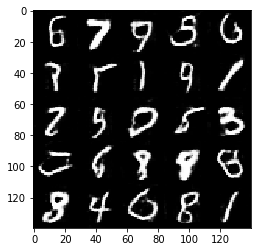

Epoch 2/2... Discriminator Loss: 1.3826... Generator Loss: 0.8960
Epoch 2/2... Discriminator Loss: 1.3799... Generator Loss: 0.9063
Epoch 2/2... Discriminator Loss: 1.3123... Generator Loss: 0.7550
Epoch 2/2... Discriminator Loss: 1.4078... Generator Loss: 0.6724
Epoch 2/2... Discriminator Loss: 1.3611... Generator Loss: 0.7196


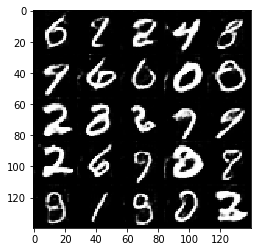

Epoch 2/2... Discriminator Loss: 1.3184... Generator Loss: 1.0146
Epoch 2/2... Discriminator Loss: 1.3587... Generator Loss: 0.9079
Epoch 2/2... Discriminator Loss: 1.6041... Generator Loss: 0.6076
Epoch 2/2... Discriminator Loss: 1.3817... Generator Loss: 0.9515
Epoch 2/2... Discriminator Loss: 1.3136... Generator Loss: 0.9765


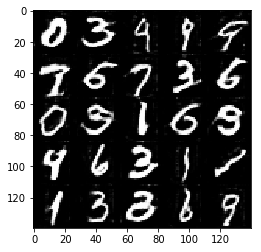

Epoch 2/2... Discriminator Loss: 1.2007... Generator Loss: 0.8640
Epoch 2/2... Discriminator Loss: 1.3143... Generator Loss: 0.9628
Epoch 2/2... Discriminator Loss: 1.2423... Generator Loss: 0.8053
Epoch 2/2... Discriminator Loss: 1.5096... Generator Loss: 0.7262
Epoch 2/2... Discriminator Loss: 1.3456... Generator Loss: 0.7481


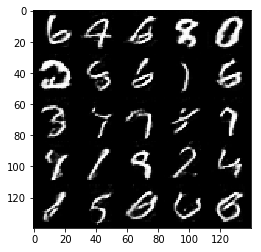

Epoch 2/2... Discriminator Loss: 1.5309... Generator Loss: 0.8380
Epoch 2/2... Discriminator Loss: 1.5165... Generator Loss: 0.7025
Epoch 2/2... Discriminator Loss: 1.2760... Generator Loss: 0.9614
Epoch 2/2... Discriminator Loss: 1.3711... Generator Loss: 0.8022
Epoch 2/2... Discriminator Loss: 1.4162... Generator Loss: 0.8697


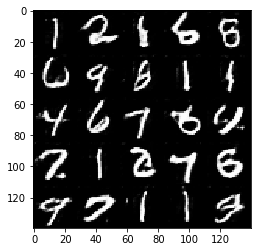

Epoch 2/2... Discriminator Loss: 1.3254... Generator Loss: 0.9902
Epoch 2/2... Discriminator Loss: 1.3924... Generator Loss: 0.8948
Epoch 2/2... Discriminator Loss: 1.3940... Generator Loss: 0.8416
Epoch 2/2... Discriminator Loss: 1.3129... Generator Loss: 0.9276
Epoch 2/2... Discriminator Loss: 1.4172... Generator Loss: 0.8800


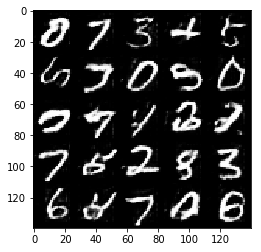

Epoch 2/2... Discriminator Loss: 1.4466... Generator Loss: 0.8458
Epoch 2/2... Discriminator Loss: 1.3625... Generator Loss: 0.7826
Epoch 2/2... Discriminator Loss: 1.4047... Generator Loss: 0.9042
Epoch 2/2... Discriminator Loss: 1.2970... Generator Loss: 0.9270
Epoch 2/2... Discriminator Loss: 1.3896... Generator Loss: 0.9482


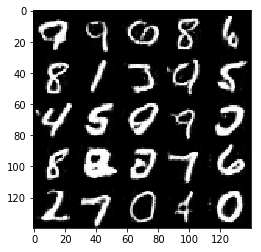

Epoch 2/2... Discriminator Loss: 1.4378... Generator Loss: 0.9251
Epoch 2/2... Discriminator Loss: 1.3287... Generator Loss: 0.8147
Epoch 2/2... Discriminator Loss: 1.3602... Generator Loss: 0.8682
Epoch 2/2... Discriminator Loss: 1.3286... Generator Loss: 0.8870
Epoch 2/2... Discriminator Loss: 1.2871... Generator Loss: 0.8904


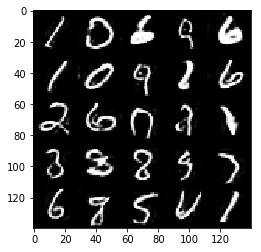

Epoch 2/2... Discriminator Loss: 1.2714... Generator Loss: 1.0880
Epoch 2/2... Discriminator Loss: 1.3201... Generator Loss: 1.0278
Epoch 2/2... Discriminator Loss: 1.3059... Generator Loss: 0.8520
Epoch 2/2... Discriminator Loss: 1.3940... Generator Loss: 0.8770
Epoch 2/2... Discriminator Loss: 1.2483... Generator Loss: 0.8535


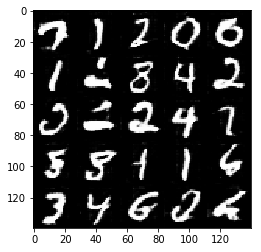

Epoch 2/2... Discriminator Loss: 1.3916... Generator Loss: 0.8922
Epoch 2/2... Discriminator Loss: 1.4519... Generator Loss: 0.7471
Epoch 2/2... Discriminator Loss: 1.2629... Generator Loss: 0.7173
Epoch 2/2... Discriminator Loss: 1.3961... Generator Loss: 1.0398
Epoch 2/2... Discriminator Loss: 1.2768... Generator Loss: 0.7954


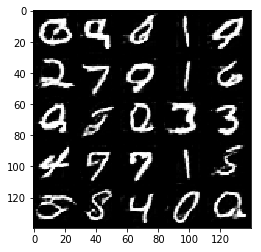

Epoch 2/2... Discriminator Loss: 1.4026... Generator Loss: 0.8167
Epoch 2/2... Discriminator Loss: 1.2772... Generator Loss: 0.8384
Epoch 2/2... Discriminator Loss: 1.3365... Generator Loss: 0.8444
Epoch 2/2... Discriminator Loss: 1.4306... Generator Loss: 0.8427
Epoch 2/2... Discriminator Loss: 1.3114... Generator Loss: 0.8339


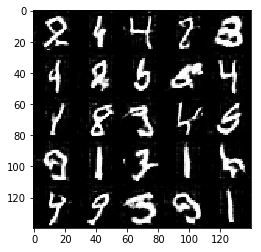

Epoch 2/2... Discriminator Loss: 1.3846... Generator Loss: 0.8941
Epoch 2/2... Discriminator Loss: 1.2492... Generator Loss: 1.0295
Epoch 2/2... Discriminator Loss: 1.4008... Generator Loss: 0.8112
Epoch 2/2... Discriminator Loss: 1.3407... Generator Loss: 0.8793
Epoch 2/2... Discriminator Loss: 1.3300... Generator Loss: 1.0086


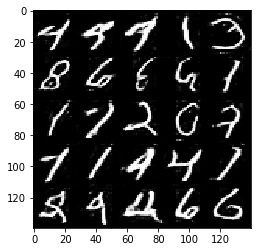

Epoch 2/2... Discriminator Loss: 1.3288... Generator Loss: 0.8629
Epoch 2/2... Discriminator Loss: 1.2984... Generator Loss: 0.8261
Epoch 2/2... Discriminator Loss: 1.3344... Generator Loss: 0.7009
Epoch 2/2... Discriminator Loss: 1.3455... Generator Loss: 0.7097
Epoch 2/2... Discriminator Loss: 1.2688... Generator Loss: 0.9297


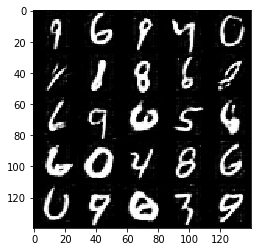

Epoch 2/2... Discriminator Loss: 1.2896... Generator Loss: 0.9964
Epoch 2/2... Discriminator Loss: 1.3403... Generator Loss: 0.8515
Epoch 2/2... Discriminator Loss: 1.3479... Generator Loss: 0.9732
Epoch 2/2... Discriminator Loss: 1.2775... Generator Loss: 0.7722
Epoch 2/2... Discriminator Loss: 1.4425... Generator Loss: 0.7518


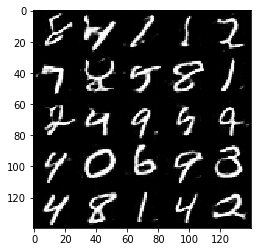

Epoch 2/2... Discriminator Loss: 1.3762... Generator Loss: 0.9218
Epoch 2/2... Discriminator Loss: 1.3487... Generator Loss: 0.7845
Epoch 2/2... Discriminator Loss: 1.2860... Generator Loss: 0.8477
Epoch 2/2... Discriminator Loss: 1.3884... Generator Loss: 0.7999
Epoch 2/2... Discriminator Loss: 1.3037... Generator Loss: 0.9337


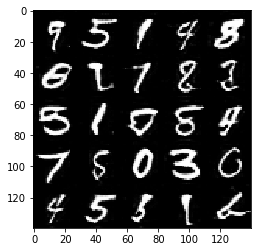

Epoch 2/2... Discriminator Loss: 1.3665... Generator Loss: 0.8984
Epoch 2/2... Discriminator Loss: 1.3751... Generator Loss: 0.7885


In [222]:
batch_size = 32
z_dim = 100
learning_rate = 0.0004
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.3274... Generator Loss: 1.1479
Epoch 1/1... Discriminator Loss: 1.7444... Generator Loss: 0.5972
Epoch 1/1... Discriminator Loss: 0.8081... Generator Loss: 2.8571
Epoch 1/1... Discriminator Loss: 0.9878... Generator Loss: 1.4582
Epoch 1/1... Discriminator Loss: 0.8405... Generator Loss: 2.5064


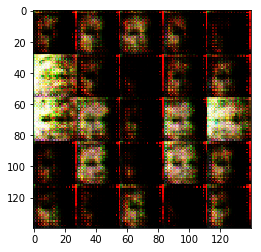

Epoch 1/1... Discriminator Loss: 1.8915... Generator Loss: 0.6844
Epoch 1/1... Discriminator Loss: 1.6659... Generator Loss: 0.7326
Epoch 1/1... Discriminator Loss: 1.5155... Generator Loss: 1.4662
Epoch 1/1... Discriminator Loss: 0.9926... Generator Loss: 1.2729
Epoch 1/1... Discriminator Loss: 1.1520... Generator Loss: 1.4778


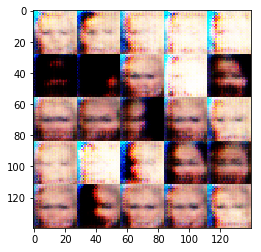

Epoch 1/1... Discriminator Loss: 1.7368... Generator Loss: 1.0925
Epoch 1/1... Discriminator Loss: 1.5834... Generator Loss: 1.4328
Epoch 1/1... Discriminator Loss: 1.2213... Generator Loss: 0.8531
Epoch 1/1... Discriminator Loss: 1.2480... Generator Loss: 1.1834
Epoch 1/1... Discriminator Loss: 0.9178... Generator Loss: 1.5675


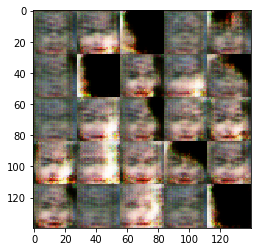

Epoch 1/1... Discriminator Loss: 1.5894... Generator Loss: 1.0812
Epoch 1/1... Discriminator Loss: 1.6735... Generator Loss: 0.7055
Epoch 1/1... Discriminator Loss: 1.3634... Generator Loss: 1.1349
Epoch 1/1... Discriminator Loss: 1.2633... Generator Loss: 1.0645
Epoch 1/1... Discriminator Loss: 2.1704... Generator Loss: 2.8399


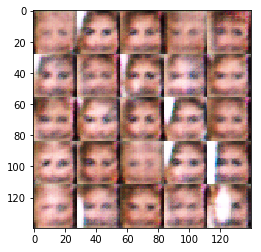

Epoch 1/1... Discriminator Loss: 1.2908... Generator Loss: 1.5150
Epoch 1/1... Discriminator Loss: 1.2785... Generator Loss: 0.8367
Epoch 1/1... Discriminator Loss: 1.3070... Generator Loss: 1.5108
Epoch 1/1... Discriminator Loss: 0.9019... Generator Loss: 1.4984
Epoch 1/1... Discriminator Loss: 1.0669... Generator Loss: 1.3445


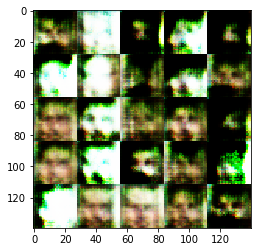

Epoch 1/1... Discriminator Loss: 1.7449... Generator Loss: 1.4448
Epoch 1/1... Discriminator Loss: 1.2542... Generator Loss: 1.2199
Epoch 1/1... Discriminator Loss: 1.3948... Generator Loss: 2.7695
Epoch 1/1... Discriminator Loss: 1.2069... Generator Loss: 1.3176
Epoch 1/1... Discriminator Loss: 1.2250... Generator Loss: 0.7350


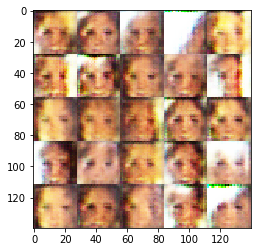

Epoch 1/1... Discriminator Loss: 1.4272... Generator Loss: 2.0041
Epoch 1/1... Discriminator Loss: 1.0191... Generator Loss: 1.6909
Epoch 1/1... Discriminator Loss: 1.1550... Generator Loss: 1.1583
Epoch 1/1... Discriminator Loss: 1.0048... Generator Loss: 1.9121
Epoch 1/1... Discriminator Loss: 0.9253... Generator Loss: 1.3020


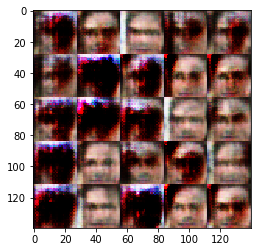

Epoch 1/1... Discriminator Loss: 1.2277... Generator Loss: 1.1193
Epoch 1/1... Discriminator Loss: 1.1979... Generator Loss: 1.3748
Epoch 1/1... Discriminator Loss: 1.5239... Generator Loss: 0.5399
Epoch 1/1... Discriminator Loss: 1.2653... Generator Loss: 1.4721
Epoch 1/1... Discriminator Loss: 1.0367... Generator Loss: 1.6890


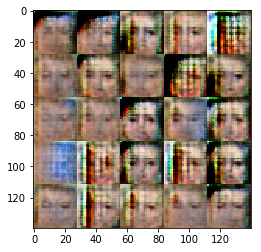

Epoch 1/1... Discriminator Loss: 1.3361... Generator Loss: 0.8246
Epoch 1/1... Discriminator Loss: 0.9382... Generator Loss: 1.5963
Epoch 1/1... Discriminator Loss: 0.9952... Generator Loss: 1.7544
Epoch 1/1... Discriminator Loss: 1.0718... Generator Loss: 1.1276
Epoch 1/1... Discriminator Loss: 1.1246... Generator Loss: 1.7153


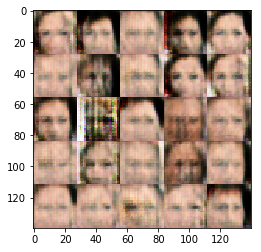

Epoch 1/1... Discriminator Loss: 1.0803... Generator Loss: 1.0220
Epoch 1/1... Discriminator Loss: 1.3279... Generator Loss: 1.0362
Epoch 1/1... Discriminator Loss: 1.7114... Generator Loss: 0.4654
Epoch 1/1... Discriminator Loss: 1.1825... Generator Loss: 1.3508
Epoch 1/1... Discriminator Loss: 1.0500... Generator Loss: 1.5315


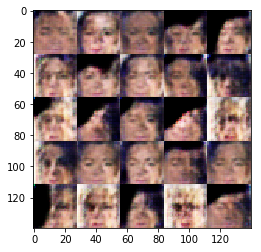

Epoch 1/1... Discriminator Loss: 1.0655... Generator Loss: 0.9821
Epoch 1/1... Discriminator Loss: 1.2815... Generator Loss: 1.0423
Epoch 1/1... Discriminator Loss: 1.4779... Generator Loss: 2.6199
Epoch 1/1... Discriminator Loss: 1.2878... Generator Loss: 0.9059
Epoch 1/1... Discriminator Loss: 1.1388... Generator Loss: 1.3166


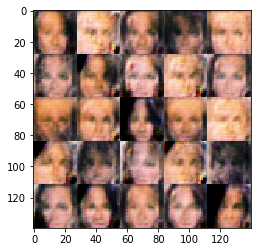

Epoch 1/1... Discriminator Loss: 1.5942... Generator Loss: 0.9555
Epoch 1/1... Discriminator Loss: 0.8659... Generator Loss: 1.6786
Epoch 1/1... Discriminator Loss: 0.9515... Generator Loss: 1.8281
Epoch 1/1... Discriminator Loss: 1.1247... Generator Loss: 2.1111
Epoch 1/1... Discriminator Loss: 0.9281... Generator Loss: 2.0661


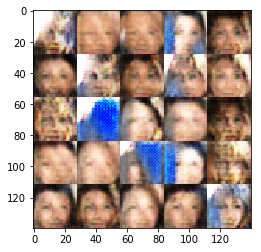

Epoch 1/1... Discriminator Loss: 1.0068... Generator Loss: 0.9895
Epoch 1/1... Discriminator Loss: 1.1867... Generator Loss: 1.0348
Epoch 1/1... Discriminator Loss: 1.4414... Generator Loss: 1.0954
Epoch 1/1... Discriminator Loss: 1.2723... Generator Loss: 1.2199
Epoch 1/1... Discriminator Loss: 1.2390... Generator Loss: 0.7970


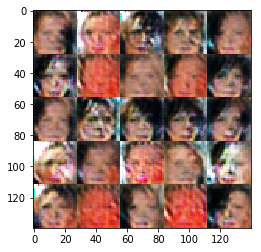

Epoch 1/1... Discriminator Loss: 0.9647... Generator Loss: 1.7262
Epoch 1/1... Discriminator Loss: 1.0370... Generator Loss: 1.5910
Epoch 1/1... Discriminator Loss: 1.5056... Generator Loss: 1.5557
Epoch 1/1... Discriminator Loss: 0.9897... Generator Loss: 1.6306
Epoch 1/1... Discriminator Loss: 1.0502... Generator Loss: 1.5974


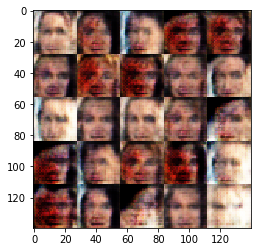

Epoch 1/1... Discriminator Loss: 0.8478... Generator Loss: 1.0635
Epoch 1/1... Discriminator Loss: 1.1515... Generator Loss: 0.9903
Epoch 1/1... Discriminator Loss: 1.1466... Generator Loss: 1.0436
Epoch 1/1... Discriminator Loss: 1.4045... Generator Loss: 1.0824
Epoch 1/1... Discriminator Loss: 0.9361... Generator Loss: 1.3276


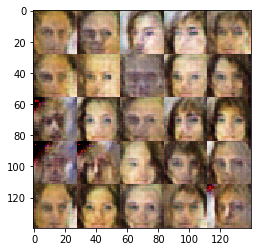

Epoch 1/1... Discriminator Loss: 1.2404... Generator Loss: 1.2173
Epoch 1/1... Discriminator Loss: 1.3824... Generator Loss: 0.6804
Epoch 1/1... Discriminator Loss: 1.1840... Generator Loss: 1.1635
Epoch 1/1... Discriminator Loss: 1.1072... Generator Loss: 1.1533
Epoch 1/1... Discriminator Loss: 1.1591... Generator Loss: 1.6537


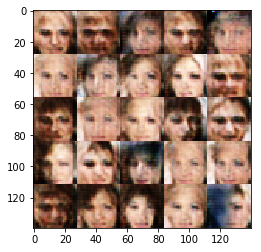

Epoch 1/1... Discriminator Loss: 0.9250... Generator Loss: 1.4963
Epoch 1/1... Discriminator Loss: 0.9608... Generator Loss: 1.0722
Epoch 1/1... Discriminator Loss: 0.8585... Generator Loss: 1.7756
Epoch 1/1... Discriminator Loss: 1.1201... Generator Loss: 1.3945
Epoch 1/1... Discriminator Loss: 0.9310... Generator Loss: 1.1899


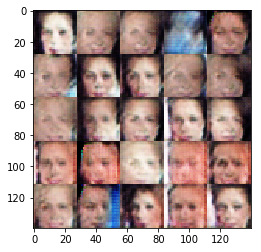

Epoch 1/1... Discriminator Loss: 1.2831... Generator Loss: 0.7748
Epoch 1/1... Discriminator Loss: 1.1644... Generator Loss: 1.2643
Epoch 1/1... Discriminator Loss: 1.1840... Generator Loss: 1.1538
Epoch 1/1... Discriminator Loss: 1.0204... Generator Loss: 1.4286
Epoch 1/1... Discriminator Loss: 1.1101... Generator Loss: 1.6835


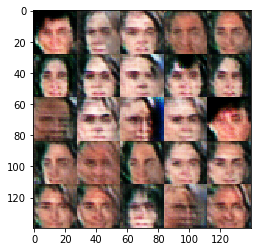

Epoch 1/1... Discriminator Loss: 1.1770... Generator Loss: 1.2013
Epoch 1/1... Discriminator Loss: 1.2749... Generator Loss: 1.1087
Epoch 1/1... Discriminator Loss: 1.1485... Generator Loss: 1.1759
Epoch 1/1... Discriminator Loss: 0.8491... Generator Loss: 1.9424
Epoch 1/1... Discriminator Loss: 1.0836... Generator Loss: 1.1887


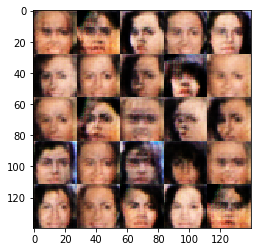

Epoch 1/1... Discriminator Loss: 1.5175... Generator Loss: 2.4710
Epoch 1/1... Discriminator Loss: 1.1507... Generator Loss: 1.1027
Epoch 1/1... Discriminator Loss: 1.1907... Generator Loss: 1.1278
Epoch 1/1... Discriminator Loss: 1.1340... Generator Loss: 1.0788
Epoch 1/1... Discriminator Loss: 1.4232... Generator Loss: 0.9977


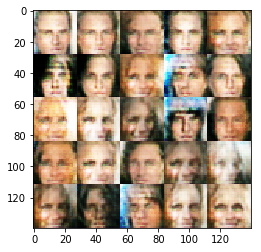

Epoch 1/1... Discriminator Loss: 0.9760... Generator Loss: 1.2378
Epoch 1/1... Discriminator Loss: 1.2780... Generator Loss: 0.8812
Epoch 1/1... Discriminator Loss: 1.3592... Generator Loss: 1.0917
Epoch 1/1... Discriminator Loss: 1.0495... Generator Loss: 1.1575
Epoch 1/1... Discriminator Loss: 1.1911... Generator Loss: 0.8854


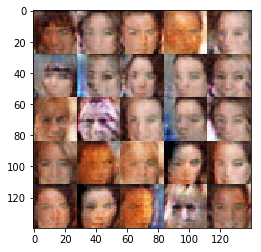

Epoch 1/1... Discriminator Loss: 1.1107... Generator Loss: 1.0998
Epoch 1/1... Discriminator Loss: 1.1665... Generator Loss: 1.3347
Epoch 1/1... Discriminator Loss: 1.4048... Generator Loss: 1.4856
Epoch 1/1... Discriminator Loss: 1.2866... Generator Loss: 1.2119
Epoch 1/1... Discriminator Loss: 1.1142... Generator Loss: 1.3801


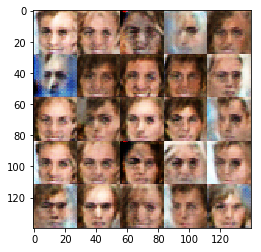

Epoch 1/1... Discriminator Loss: 1.0696... Generator Loss: 1.2178
Epoch 1/1... Discriminator Loss: 0.9727... Generator Loss: 1.3108
Epoch 1/1... Discriminator Loss: 1.1249... Generator Loss: 1.3108
Epoch 1/1... Discriminator Loss: 1.3235... Generator Loss: 0.9159
Epoch 1/1... Discriminator Loss: 1.1061... Generator Loss: 1.2142


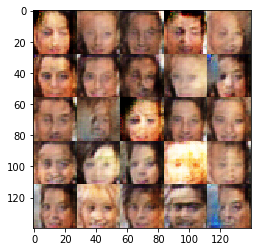

Epoch 1/1... Discriminator Loss: 1.0608... Generator Loss: 1.2884
Epoch 1/1... Discriminator Loss: 1.1169... Generator Loss: 0.9630
Epoch 1/1... Discriminator Loss: 1.2193... Generator Loss: 1.4443
Epoch 1/1... Discriminator Loss: 1.0287... Generator Loss: 1.1116
Epoch 1/1... Discriminator Loss: 1.0641... Generator Loss: 1.0845


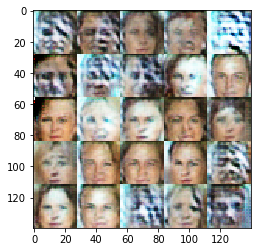

Epoch 1/1... Discriminator Loss: 1.1558... Generator Loss: 1.6594
Epoch 1/1... Discriminator Loss: 1.1876... Generator Loss: 1.4573
Epoch 1/1... Discriminator Loss: 1.1132... Generator Loss: 1.3439
Epoch 1/1... Discriminator Loss: 1.2391... Generator Loss: 0.9007
Epoch 1/1... Discriminator Loss: 1.1462... Generator Loss: 1.1388


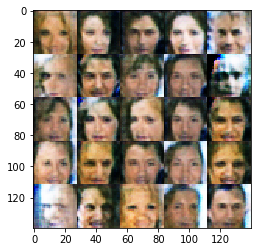

Epoch 1/1... Discriminator Loss: 1.1428... Generator Loss: 1.0991
Epoch 1/1... Discriminator Loss: 1.2541... Generator Loss: 1.1912
Epoch 1/1... Discriminator Loss: 1.1825... Generator Loss: 1.2425
Epoch 1/1... Discriminator Loss: 1.1929... Generator Loss: 0.9323
Epoch 1/1... Discriminator Loss: 1.0843... Generator Loss: 1.1088


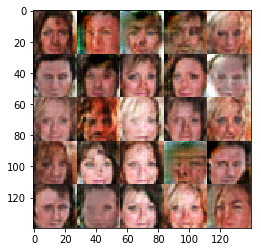

Epoch 1/1... Discriminator Loss: 1.2964... Generator Loss: 1.1222
Epoch 1/1... Discriminator Loss: 1.3660... Generator Loss: 0.9559
Epoch 1/1... Discriminator Loss: 1.2035... Generator Loss: 1.2241
Epoch 1/1... Discriminator Loss: 1.2355... Generator Loss: 1.1531
Epoch 1/1... Discriminator Loss: 1.2035... Generator Loss: 0.7777


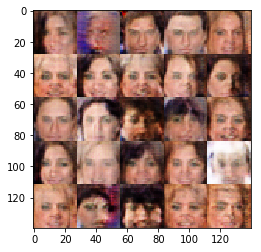

Epoch 1/1... Discriminator Loss: 1.0961... Generator Loss: 0.8394
Epoch 1/1... Discriminator Loss: 0.9757... Generator Loss: 1.3680
Epoch 1/1... Discriminator Loss: 1.3509... Generator Loss: 1.6965
Epoch 1/1... Discriminator Loss: 1.1103... Generator Loss: 1.2008
Epoch 1/1... Discriminator Loss: 1.1237... Generator Loss: 1.0062


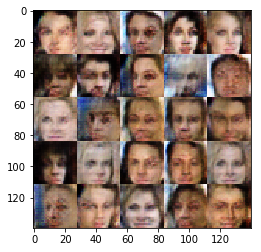

Epoch 1/1... Discriminator Loss: 1.2290... Generator Loss: 0.9414
Epoch 1/1... Discriminator Loss: 1.0628... Generator Loss: 1.5815
Epoch 1/1... Discriminator Loss: 1.2549... Generator Loss: 1.0302
Epoch 1/1... Discriminator Loss: 1.2202... Generator Loss: 0.9537
Epoch 1/1... Discriminator Loss: 1.2823... Generator Loss: 1.0976


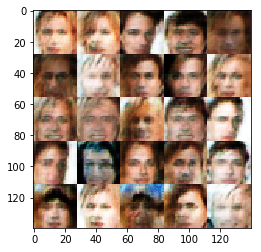

Epoch 1/1... Discriminator Loss: 1.2894... Generator Loss: 1.7022
Epoch 1/1... Discriminator Loss: 0.9677... Generator Loss: 1.2657
Epoch 1/1... Discriminator Loss: 1.1044... Generator Loss: 0.9844
Epoch 1/1... Discriminator Loss: 1.3461... Generator Loss: 0.7949
Epoch 1/1... Discriminator Loss: 1.0807... Generator Loss: 1.1619


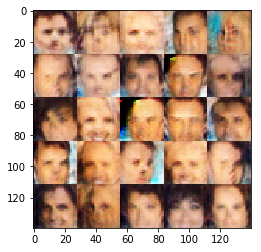

Epoch 1/1... Discriminator Loss: 1.2025... Generator Loss: 1.5267
Epoch 1/1... Discriminator Loss: 1.2022... Generator Loss: 1.0893
Epoch 1/1... Discriminator Loss: 1.3215... Generator Loss: 1.0016
Epoch 1/1... Discriminator Loss: 0.9611... Generator Loss: 1.3162
Epoch 1/1... Discriminator Loss: 1.1138... Generator Loss: 1.0199


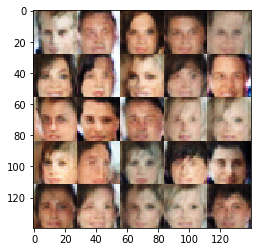

Epoch 1/1... Discriminator Loss: 1.0613... Generator Loss: 1.2017
Epoch 1/1... Discriminator Loss: 1.1307... Generator Loss: 1.0984
Epoch 1/1... Discriminator Loss: 1.0960... Generator Loss: 1.3103


In [221]:
batch_size = 64
z_dim = 100
learning_rate = 0.0008
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Attempt for more epochs

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.